In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Define file paths
zip_file_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Fraud Detection\creditcard.csv.zip'
extracted_file_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Fraud Detection\creditcard.csv'

In [3]:
# Extract zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_file_path))

In [4]:
# Load dataset
df = pd.read_csv(extracted_file_path)

In [5]:
# Basic data exploration
print("Dataset shape:", df.shape)
print("First few rows of the dataset:")
print(df.head())
print("Dataset info:")
print(df.info())
print("Class distribution:")
print(df['Class'].value_counts())

Dataset shape: (284807, 31)
First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.1374

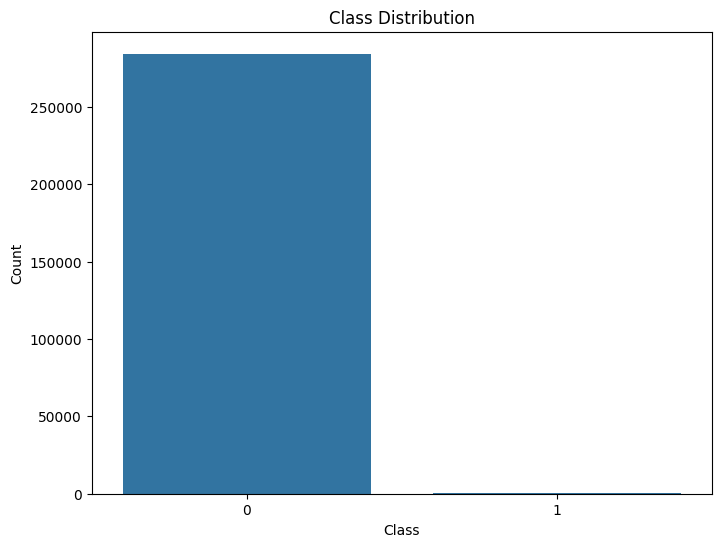

In [6]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [7]:
# Preprocessing
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Feature and target separation
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
# Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)


Training Logistic Regression...

Training Random Forest...

Training Neural Network...


In [10]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve
    
# Evaluation
print(f"\n{name} Classification Report:")
print(classification_report(y_test, y_pred))
print(f"{name} Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.90      0.72      0.80       136

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Neural Network Confusion Matrix:
[[85296    11]
 [   38    98]]


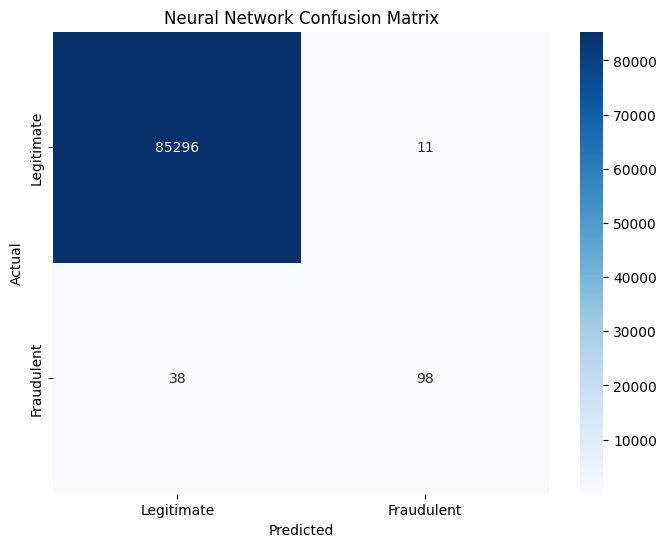

In [11]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.title(f'{name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

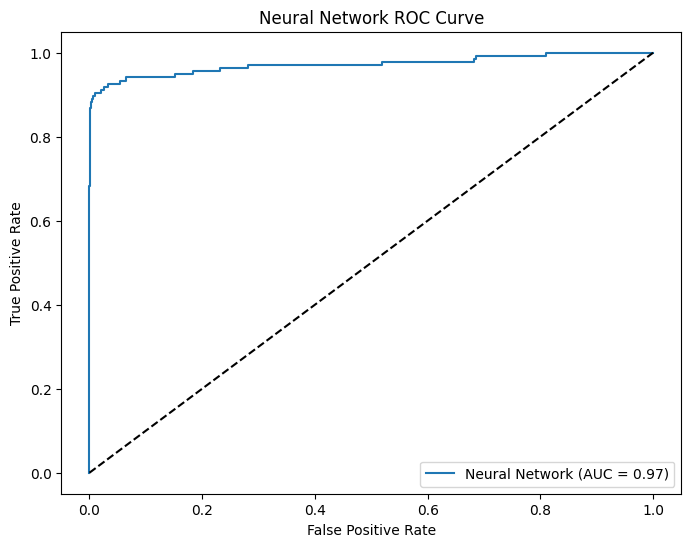

In [12]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
    
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'{name} ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [13]:
print("Script completed.")

Script completed.
